# Dataset1


In [19]:
from geopy.distance import geodesic
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

In [20]:
Tapei_staion=[25.047637204053995, 121.5171273798563]
Hsinchu_staion=[24.801750331885113, 120.9716203981461]
Taichung_station=[24.137523918186687, 120.68683583244295]
Douliu_station=[23.712201175089422, 120.54104266971164]
Kaohsiung_station=[22.6396706176077, 120.30261518317573]
Yuli_station=[23.727506999999997, 120.29999999999999]
Zhiben_station=[22.710222674264436, 121.06071858229596]

In [21]:
dist=geodesic(Tapei_staion,Hsinchu_staion).km

In [22]:
print(dist)

61.46661858328025


In [23]:
station_coords = [
    (25.047924, 121.517491), # 台北車站
    (24.805832, 120.968798), # 新竹車站
    (24.137611, 120.685417), # 台中車站
    (23.711975, 120.427538), # 斗六車站
    (22.629611, 120.301388), # 高雄車站
    (23.33825, 121.454262),  # 花蓮車站
    (22.756391, 121.103889)  # 台東車站
]

In [24]:
X = np.array(station_coords)
embedding = MDS(n_components=2, dissimilarity='euclidean')
coords = embedding.fit_transform(X)

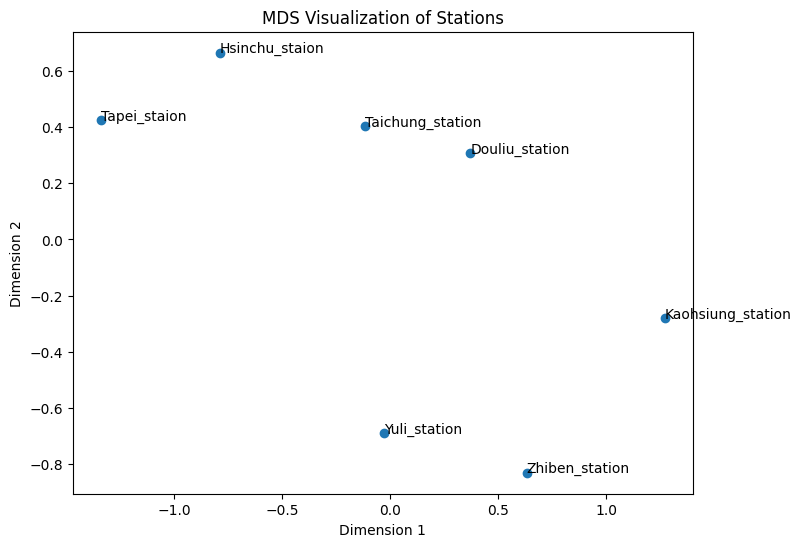

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1])

# 添加標註
station_names = ['Tapei_staion', 'Hsinchu_staion', 'Taichung_station', 'Douliu_station', 'Kaohsiung_station', 'Yuli_station', 'Zhiben_station']
for i, name in enumerate(station_names):
    plt.annotate(name, coords[i])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Visualization of Stations')
plt.show()

In [26]:
import gmplot

# 設置谷歌地圖API密鑰
apikey = " "

# 創建GoogleMapPlotter對象並設置初始中心點和縮放級別
gmap = gmplot.GoogleMapPlotter(24, 121, 7, apikey=apikey)

# 定義要標記的車站坐標
station_coords = [
    (25.047924, 121.517491), # 台北車站
    (24.805832, 120.968798), # 新竹車站
    (24.137611, 120.685417), # 台中車站
    (23.711975, 120.427538), # 斗六車站
    (22.629611, 120.301388), # 高雄車站
    (23.33825, 121.454262),  # 花蓮車站
    (22.756391, 121.103889)  # 台東車站
]

# 遍歷所有車站坐標並在地圖上標記
for coord in station_coords:
    gmap.marker(coord[0], coord[1], color='cornflowerblue')

# 繪製地圖並保存為HTML文件
gmap.draw('stations_map.html')

# Dataset2


In [27]:
import pandas as pd
from random import randint

In [28]:
# drink = [['A', '7Up', 7, (100, 200), randint(500, 1000), 100],
#          ['B','Sprite', 6, (200, 10), randint(500, 1000), 200],
#          ['C','Pepsi', 5, (200, 10), randint(500, 1000), 100],
#          ['D','Coke', 4, (400, 100), randint(500, 1000), 400],
#          ['E','Cappuccino', 3, (800, 10), randint(1, 500), 400],
#          ['F','Espresso', 2, (800, 10), randint(1, 500), 200],
#          ['G','Latte', 1, (900, 400), randint(1, 500), 100]]
# drinkDataset=pd.DataFrame(drink,columns=['Calss','Drink','Rank','Amount(Mean)','Quantity(Variance)','Count'])

# 1-of-K

In [29]:
drink = [['A','7Up', 7, 100, 200, randint(500, 1000), 100],
         ['B','Sprite', 6, 200, 10, randint(500, 1000), 200],
         ['C','Pepsi', 5, 200, 10, randint(500, 1000), 100],
         ['D','Coke', 4, 400, 100, randint(500, 1000), 400],
         ['E','Cappuccino', 3, 800, 10, randint(1, 500), 400],
         ['F','Espresso', 2, 800, 10, randint(1, 500), 200],
         ['G','Latte', 1, 900, 400, randint(1, 500), 100]]
drinkDataset=pd.DataFrame(drink,columns=['Class','Drink','Rank','Amount(Mean)','Amount(Variance)','Quantity','Count'])

In [30]:
drinkDataset

,Class,Drink,Rank,Amount(Mean),Amount(Variance),Quantity,Count
0,A,7Up,7,100,200,926,100
1,B,Sprite,6,200,10,887,200
2,C,Pepsi,5,200,10,744,100
3,D,Coke,4,400,100,734,400
4,E,Cappuccino,3,800,10,69,400
5,F,Espresso,2,800,10,322,200
6,G,Latte,1,900,400,216,100


In [31]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data = []
for _, row in drinkDataset.iterrows():
    mean = row['Amount(Mean)']
    variance = row['Amount(Variance)']
    class_label = row['Class']
    count = row['Count']
    
    # 生成Amount数据
    amounts = np.random.normal(mean, np.sqrt(variance), count)
    # 随机生成Quantity数据
    quantities = np.random.randint(row['Quantity'] - 50, row['Quantity'] + 50, count)
    
    for i in range(count):
        data.append([class_label, row['Drink'], row['Rank'], amounts[i], quantities[i]])

# 创建新的数据框
generated_df = pd.DataFrame(data, columns=['Class', 'Drink', 'Rank', 'Amount', 'Quantity'])

In [32]:
generated_df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,80.642965,946
1,A,7Up,7,104.939057,907
2,A,7Up,7,90.376570,952
3,A,7Up,7,98.009381,907
4,A,7Up,7,93.545311,957
...,...,...,...,...,...
1495,G,Latte,1,904.870088,177
1496,G,Latte,1,860.772325,190
1497,G,Latte,1,895.496424,239
1498,G,Latte,1,893.165690,180


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


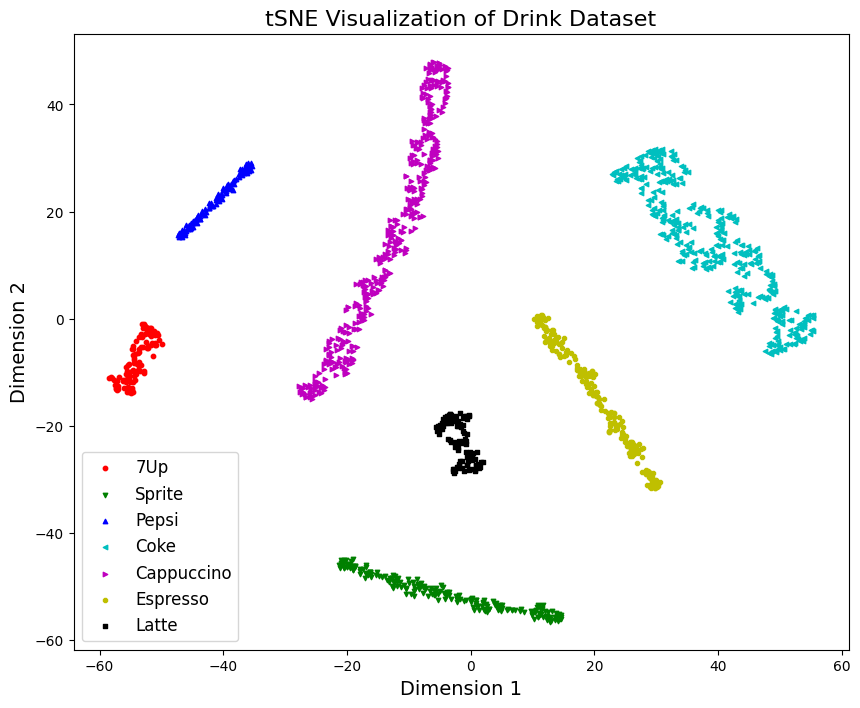

In [33]:
# 1-of-K coding for Class column
encoder = OneHotEncoder(sparse=False)
class_encoded = encoder.fit_transform(generated_df[['Class']])

# Concatenate numerical features and one-hot encoded Class
X = np.concatenate([generated_df[['Rank', 'Amount', 'Quantity']].values, class_encoded], axis=1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Visualize the result
classes = generated_df['Drink'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', '8', 's']

fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(classes):
    indices = generated_df['Drink'] == class_label
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], c=colors[i], marker=markers[i], label=class_label, s=10)

ax.set_title('tSNE Visualization of Drink Dataset', fontsize=16)
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.legend(loc='best', fontsize=12)
plt.show()

# distance hierarchy

In [13]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from gensim.models import Word2Vec
import re
import gensim.downloader as api
import seaborn as sns

In [11]:
data = {
    'Class': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Drink': ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte'],
    'Rank': [7, 6, 5, 4, 3, 2, 1],
    'Amount(N(μ,σ))': ['N(100, 200)', 'N(200, 10)', 'N(200, 10)', 'N(400, 100)', 'N(800, 10)', 'N(800, 10)', 'N(900, 400)'],
    'Quantity': ['Random(500, 1000)', 'Random(500, 1000)', 'Random(500, 1000)', 'Random(500, 1000)', 'Random(1, 500)', 'Random(1, 500)', 'Random(1, 500)'],
    'Count': [100, 200, 100, 400, 400, 200, 100]
}
df = pd.DataFrame(data)

In [12]:
# 1. 生成數據集
data = []
for class_label in df['Class'].unique():
    class_data = df[df['Class'] == class_label]
    for _, row in class_data.iterrows():
        drink, rank, count = row['Drink'], row['Rank'], row['Count']
        mu, sigma = map(int, re.findall(r'\d+', row['Amount(N(μ,σ))']))
        min_val, max_val = map(int, re.findall(r'\d+', row['Quantity']))

        amounts = np.random.normal(mu, sigma, count)
        quantities = np.random.uniform(min_val, max_val, count)

        for i in range(count):
            data_point = {
                'Class': class_label,
                'Drink': drink,
                'Rank': rank,
                'Amount': amounts[i],
                'Quantity': quantities[i]
            }
            data.append(data_point)

df = pd.DataFrame(data)
df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,-57.339101,957.935019
1,A,7Up,7,-212.311324,512.242809
2,A,7Up,7,278.933400,524.776219
3,A,7Up,7,103.007921,843.996337
4,A,7Up,7,69.856533,949.312505
...,...,...,...,...,...
1495,G,Latte,1,826.340256,14.220735
1496,G,Latte,1,1038.714678,401.443906
1497,G,Latte,1,584.368516,61.635439
1498,G,Latte,1,646.430632,14.493917


In [14]:
model = api.load("word2vec-ruscorpora-300")


unique_drinks = df['Drink'].unique().tolist()
drink_vectors = np.array([model[drink] for drink in unique_drinks if drink in model.key_to_index])


missing_drinks = [drink for drink in unique_drinks if drink not in model.key_to_index]
if missing_drinks:
    print("以下飲料不在 GoogleNews 詞彙表中：", missing_drinks)


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(drink_vectors)

scaling_factor = 0.1
tsne_results = tsne_results * scaling_factor


tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['Drink'] = [drink for drink in unique_drinks if drink in model]  # 只保留在 GoogleNews 中的飲料


plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='Drink', palette='tab10', s=100)
for i, row in tsne_df.iterrows():
    plt.text(row['x']+0.01, row['y']+0.01, row['Drink'], fontsize=9)
plt.title('t-SNE visualization of Drink word vectors (GoogleNews)')
plt.show()

[==================================================] 100.0% 198.8/198.8MB downloaded
以下飲料不在 GoogleNews 詞彙表中： ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte']


c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [2]:
# 訓練 Word2Vec 模型在 Drink 欄位上
drinks = [row for row in generated_df['Drink']]
model = Word2Vec(sentences=[drinks], vector_size=100, window=1, min_count=1, workers=4)

# 計算數值特徵距離
scaler = StandardScaler()
numerical_features = generated_df[['Rank', 'Amount', 'Quantity']].values
numerical_features_normalized = scaler.fit_transform(numerical_features)
numerical_dist_matrix = squareform(pdist(numerical_features_normalized, metric='euclidean'))

# 計算分類特徵距離
unique_drinks = generated_df['Drink'].unique()
drink_vectors = [model.wv[drink] for drink in unique_drinks]
categorical_dist_matrix = squareform(pdist(drink_vectors, metric='euclidean'))

# 創建從飲料名稱到其在分類距離矩陣中索引的映射
drink_to_index = {drink: idx for idx, drink in enumerate(unique_drinks)}

# 擴展分類距離矩陣以匹配數值距離矩陣的形狀
categorical_dist_matrix_expanded = np.zeros_like(numerical_dist_matrix)
for i in range(generated_df.shape[0]):
    for j in range(generated_df.shape[0]):
        drink_i = generated_df.iloc[i]['Drink']
        drink_j = generated_df.iloc[j]['Drink']
        index_i = drink_to_index[drink_i]
        index_j = drink_to_index[drink_j]
        categorical_dist_matrix_expanded[i, j] = categorical_dist_matrix[index_i, index_j]

# 合併數值和分類距離
dist_matrix = numerical_dist_matrix + categorical_dist_matrix_expanded

# 使用 t-SNE 進行降維
tsne = TSNE(n_components=2, random_state=42, metric='precomputed')
X_embedded = tsne.fit_transform(dist_matrix)



c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\mb207\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


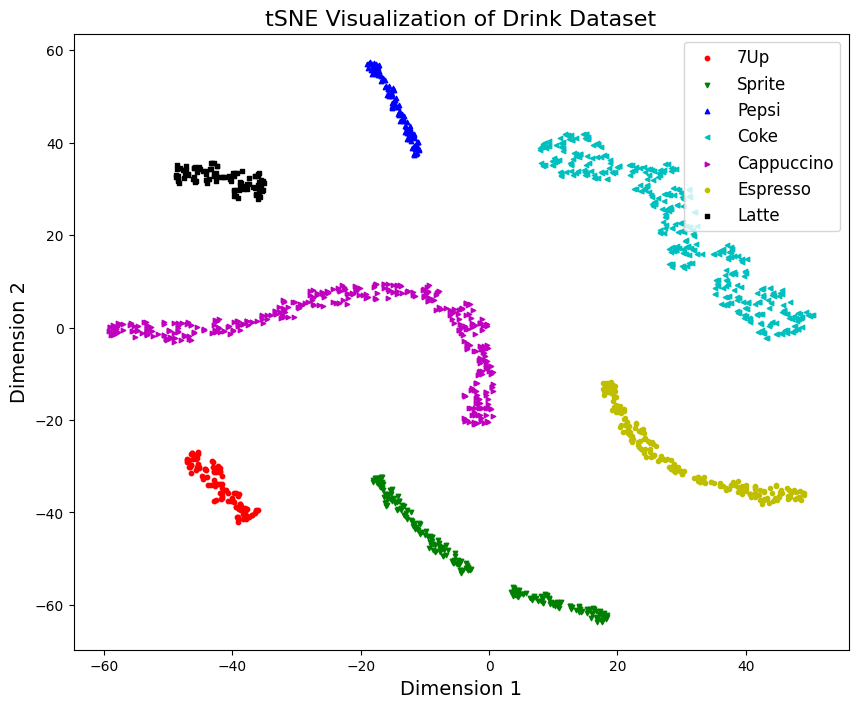

In [7]:
drinks = generated_df['Drink'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', '8', 's']

fig, ax = plt.subplots(figsize=(10, 8))
for i, drink_name in enumerate(drinks):
    indices = generated_df['Drink'] == drink_name
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], c=colors[i], marker=markers[i], label=drink_name, s=10)

ax.set_title('tSNE Visualization of Drink Dataset', fontsize=16)
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.legend(loc='best', fontsize=12)
plt.show()